In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm
import pysam

# Fragment Lengths

In [9]:
HG02011_FragmentLength = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/HG02011_fragmentLengths.csv")
HC02666_FragmentLength = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/HC02666_fragmentLengths.csv")
HG002_FragmentLength = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/HG002_fragmentLengths.csv")
HG00358_FragmentLength = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/HG00358_fragmentLengths.csv")
HG01106_FragmentLength = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/HG01106_fragmentLengths.csv")
HG01890_FragmentLength = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/HG01890_fragmentLengths.csv")
HG01952_FragmentLength = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/HG01952_fragmentLengths.csv")

In [11]:
HG01952_FragmentLength[HG01952_FragmentLength['SpacerBlock']==8]

,SpacerBlock,Unnamed: 1,SpacerBlock.1,Length,Start,End
1695,8,1695,8,2187,9641478,9643664
1696,8,1696,8,368,9643665,9644032
1697,8,1697,8,70,9644033,9644102
1698,8,1698,8,3,9644103,9644105


In [7]:
HG01890_FragmentLength[HG01890_FragmentLength['SpacerBlock']==6]

,SpacerBlock,Unnamed: 1,SpacerBlock.1,Length,Start,End
1423,6,1423,6,5722,34358919,34364640


In [22]:
fragLengths = list(HG02011_FragmentLength['Length']) + list(HC02666_FragmentLength['Length']) + list(HG002_FragmentLength['Length']) +list(HG00358_FragmentLength['Length']) + list(HG01106_FragmentLength['Length']) + list(HG01890_FragmentLength['Length']) + list(HG01952_FragmentLength['Length'])
print(max(fragLengths))
print(min(fragLengths))

205830
3


# Consensus Kmer

In [2]:
abundanceConsensus = pd.read_csv("/home/mark/Desktop/chromosome_y/centReferences/Reference_KMER_Profile.csv").set_index("Unnamed: 0")
abundanceConsensus

,GATGG,GCGCT,GCTCG,CCATT,GGAAA,GCGCA,GTCCT,TTGAC,CTGTG,ACTGA,...,AAAGT,TCAGT,TCCAA,ACAAA,GCAGT,GTACA,TTGGG,TAGCG,AGGCC,GGCCT
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Yqhet_3k1bp,0.000321,0.0,0.000000,0.0,0.003852,0.0,0.000000,0.000000,0.00000,0.002568,...,0.000642,0.00000,0.001284,0.000642,0.003210,0.000000,0.000321,0.0,0.0,0.0
DYZ18_Yq,0.000350,0.0,0.000000,0.0,0.004895,0.0,0.000000,0.000350,0.00035,0.001748,...,0.000000,0.00035,0.000699,0.000699,0.002448,0.000000,0.000350,0.0,0.0,0.0
DYZ1_Yq,0.000842,0.0,0.000281,0.0,0.008135,0.0,0.000281,0.001122,0.00000,0.000842,...,0.001122,0.00000,0.001964,0.000281,0.000561,0.000281,0.000000,0.0,0.0,0.0
Yqhet_2k7bp,0.001087,0.0,0.000362,0.0,0.005797,0.0,0.000362,0.000725,0.00000,0.000725,...,0.000362,0.00000,0.000725,0.000362,0.000725,0.000362,0.000000,0.0,0.0,0.0


In [3]:
from scipy.spatial import distance
HeatmapDF = pd.DataFrame(index=abundanceConsensus.index, columns= abundanceConsensus.index).fillna(0.0)
HeatmapDF

Unnamed: 0,Yqhet_3k1bp,DYZ18_Yq,DYZ1_Yq,Yqhet_2k7bp
Unnamed: 0,,,,
Yqhet_3k1bp,0.0,0.0,0.0,0.0
DYZ18_Yq,0.0,0.0,0.0,0.0
DYZ1_Yq,0.0,0.0,0.0,0.0
Yqhet_2k7bp,0.0,0.0,0.0,0.0


In [4]:
for row in HeatmapDF.index:
    for column in HeatmapDF.columns:
        HeatmapDF.at[row,column] = 1- float(distance.braycurtis(list(abundanceConsensus.loc[row]), list(abundanceConsensus.loc[column])))
HeatmapDF

Unnamed: 0,Yqhet_3k1bp,DYZ18_Yq,DYZ1_Yq,Yqhet_2k7bp
Unnamed: 0,,,,
Yqhet_3k1bp,1.000000,0.913407,0.616042,0.674951
DYZ18_Yq,0.913407,1.000000,0.605992,0.664576
DYZ1_Yq,0.616042,0.605992,1.000000,0.853436
Yqhet_2k7bp,0.674951,0.664576,0.853436,1.000000


In [5]:
HeatmapDF.rename(index={'Yqhet_3k1bp':'3.1kbp', 'DYZ18_Yq':'DYZ18','DYZ1_Yq':'DYZ1', 'Yqhet_2k7bp':'2.7kbp' },columns={'Yqhet_3k1bp':'3.1kbp', 'DYZ18_Yq':'DYZ18','DYZ1_Yq':'DYZ1', 'Yqhet_2k7bp':'2.7kbp' }, inplace=True)

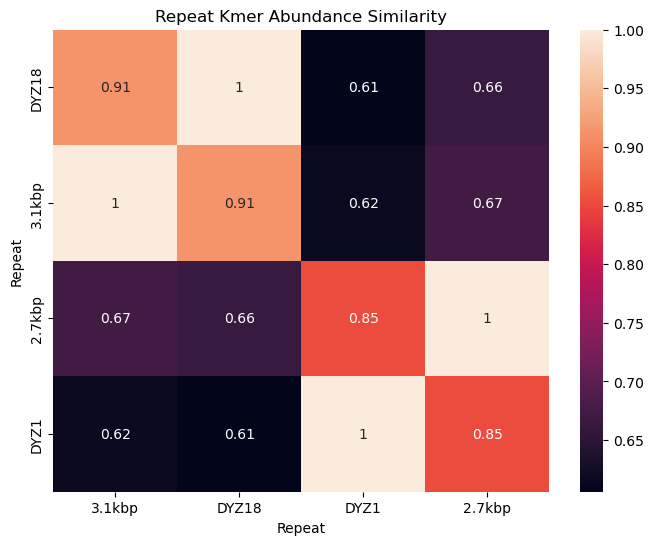

In [9]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 8,6
sns.heatmap(HeatmapDF.loc[['DYZ18','3.1kbp','2.7kbp','DYZ1']], annot=True)
plt.title("Repeat Kmer Abundance Similarity")
plt.xlabel("Repeat")
plt.ylabel("Repeat")
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/Consensus_Sequence_Kmer_Similarity.jpg", dpi=300, bbox_inches='tight')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/Consensus_Sequence_Kmer_Similarity.pdf", dpi=300, bbox_inches='tight')

plt.show()

In [11]:
abundanceConsensus.loc[:, abundanceConsensus.loc[['DYZ1_Yq']].max().sort_values(ascending=False).index]

,AATGG,ATGGA,GAATG,GGAAT,TGGAA,TCGAA,CGAAT,GAATC,AATCG,ATCGA,...,CTATC,GAGTT,AGGAG,GGCTA,CAACC,GTAAC,CCGTT,TTCAG,GCACA,GGCCT
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Yqhet_3k1bp,0.047191,0.043981,0.044944,0.045586,0.047191,0.009310,0.006742,0.012841,0.008989,0.008026,...,0.0,0.000963,0.002568,0.000321,0.000321,0.00000,0.0,0.0,0.0,0.0
DYZ18_Yq,0.046503,0.044056,0.044056,0.045804,0.047552,0.008741,0.006993,0.012587,0.008741,0.007692,...,0.0,0.001399,0.002448,0.000000,0.000000,0.00035,0.0,0.0,0.0,0.0
DYZ1_Yq,0.070687,0.069565,0.069285,0.068443,0.066480,0.016830,0.014025,0.012903,0.010659,0.010379,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
Yqhet_2k7bp,0.066304,0.065217,0.064855,0.062681,0.063768,0.014130,0.012681,0.010507,0.009058,0.009420,...,0.0,0.000362,0.000362,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0


In [29]:
1- float(distance.braycurtis(list(abundanceConsensus.loc['Yqhet_3k1bp']), list(abundanceConsensus.loc['DYZ18_Yq'])))

0.9134073791377184

In [31]:
1- float(distance.braycurtis(list(abundanceConsensus.loc['Yqhet_2k7bp']), list(abundanceConsensus.loc['DYZ18_Yq'])))

0.6645763656633212

In [32]:
1- float(distance.braycurtis(list(abundanceConsensus.loc['Yqhet_3k1bp']), list(abundanceConsensus.loc['Yqhet_2k7bp'])))

0.6749511480214949

In [30]:
1- float(distance.braycurtis(list(abundanceConsensus.loc['Yqhet_3k1bp']), list(abundanceConsensus.loc['DYZ1_Yq'])))

0.6160423593929747

In [33]:
1- float(distance.braycurtis(list(abundanceConsensus.loc['Yqhet_2k7bp']), list(abundanceConsensus.loc['DYZ1_Yq'])))

0.8534361851332404

In [34]:
1- float(distance.braycurtis(list(abundanceConsensus.loc['DYZ18_Yq']), list(abundanceConsensus.loc['DYZ1_Yq'])))

0.6059921144773874

# Fragments

In [3]:
HC02666_frags = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/HC02666_fragmentLengths.csv")
HG01890_frags = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/HG01890_fragmentLengths.csv")
HG00358_frags = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/HG00358_fragmentLengths.csv")
HG01952_frags = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/HG01952_fragmentLengths.csv")
HG02011_frags = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/HG02011_fragmentLengths.csv")
HG01106_frags = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/HG01106_fragmentLengths.csv")
HG002_frags = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/HG002_fragmentLengths.csv")

In [83]:
print(np.min(HG01890_frags['Length']))
print(np.max(HG01890_frags['Length']))
print(np.min(HG00358_frags['Length']))
print(np.max(HG00358_frags['Length']))
print(np.min(HG01952_frags['Length']))
print(np.max(HG01952_frags['Length']))
print(np.min(HG02011_frags['Length']))
print(np.max(HG02011_frags['Length']))
print(np.min(HG01106_frags['Length']))
print(np.max(HG01106_frags['Length']))
print(np.min(HG002_frags['Length']))
print(np.max(HG002_frags['Length']))
print(np.min(HC02666_frags['Length']))
print(np.max(HC02666_frags['Length']))

24
204300
24
205830
3
165411
24
154943
5
180048
25
154032
25
131969


In [79]:
print(collections.Counter(HC02666_frags['Length']))
print(collections.Counter(HG01890_frags['Length']))
print(collections.Counter(HG00358_frags['Length']))
print(collections.Counter(HG01952_frags['Length']))
print(collections.Counter(HG02011_frags['Length']))
print(collections.Counter(HG01106_frags['Length']))
print(collections.Counter(HG002_frags['Length']))

Counter({3569: 342, 3574: 301, 3564: 275, 3559: 250, 3549: 242, 3544: 238, 3554: 218, 3534: 180, 3539: 178, 3584: 171, 3579: 157, 3529: 112, 3519: 104, 3589: 92, 3558: 84, 3543: 84, 3553: 84, 3548: 84, 3563: 65, 3524: 64, 3568: 56, 3573: 54, 3533: 47, 3594: 45, 819: 34, 3514: 33, 3578: 30, 3518: 29, 3538: 28, 3557: 24, 3583: 24, 1505: 19, 3599: 18, 3503: 18, 3523: 15, 3509: 15, 3588: 14, 3593: 14, 3540: 14, 790: 14, 3513: 13, 3565: 13, 2695: 13, 2666: 13, 3504: 11, 3585: 11, 3580: 11, 3575: 11, 7137: 11, 3604: 10, 3562: 10, 2059: 10, 3535: 9, 3528: 9, 3542: 9, 3572: 9, 3551: 9, 3550: 9, 3508: 8, 3567: 8, 3547: 8, 3498: 7, 1891: 7, 3552: 7, 3570: 7, 1495: 7, 3068: 7, 2685: 7, 3520: 6, 3546: 6, 289: 6, 3537: 6, 3587: 6, 3577: 6, 3609: 6, 3582: 6, 565: 6, 7093: 5, 2661: 5, 5772: 5, 844: 5, 3555: 5, 1070: 5, 2061: 5, 2717: 5, 1114: 4, 3515: 4, 1638: 4, 3522: 4, 290: 4, 3619: 4, 820: 4, 3179: 4, 7107: 4, 5547: 4, 7158: 4, 1397: 4, 5562: 4, 2074: 4, 7156: 4, 3530: 4, 3053: 4, 3492: 4, 7127: 

In [7]:
HG002_DYZ2 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/T2T/T2T_rbDF2_Kmode.csv")
HG00358_DYZ2 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG00358/HG00358_rbDF2_Kmode.csv")
HG01952_DYZ2 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01952/HG01952_rbDF2_Kmode.csv")
HG01890_DYZ2 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01890/HG01890_rbDF2_Kmode.csv")
HG02011_DYZ2 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG02011/HG02011_rbDF2_Kmode.csv")
HG01106_DYZ2 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01106/HG01106_rbDF2_Kmode.csv")
HC02666_DYZ2 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HC02666/HC02666_rbDF2_Kmode.csv")

In [8]:
HG002_DYZ2['Sample']='HG002'
HG00358_DYZ2['Sample']='HG00358' # = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Finalized_Fragmentdf.csv").drop(columns=['Unnamed: 0','index'])
HG01952_DYZ2['Sample']='HG01952' #= pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Finalized_Fragmentdf.csv").drop(columns=['Unnamed: 0','index'])
HG01890_DYZ2['Sample']='HG01890' #= pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/Finalized_Fragmentdf.csv").drop(columns=['Unnamed: 0','index'])
HG02011_DYZ2['Sample']='HG02011' #= pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/Finalized_Fragmentdf.csv").drop(columns=['Unnamed: 0','index'])
HG01106_DYZ2['Sample']='HG01106' #= pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Finalized_Fragmentdf.csv").drop(columns=['Unnamed: 0','index'])
HC02666_DYZ2['Sample']='HC02666'

In [9]:
HC02666_DYZ2

,Alu,RepeatBlock,Lengths,Group,Block_Size,KMode_cluster,Sample
0,C_AluY_30358347-30358634,0,2214,['45593 372 23.4 4.5 3.3 chrY.01-24.01.PAR1-PA...,2000-2999,#F6C324,HC02666
1,C_AluY_30360759-30361047,0,2402,['45596 372 19.8 8.9 2.8 chrY.01-24.01.PAR1-PA...,2000-2999,#F6C324,HC02666
2,C_AluY_30363169-30363457,0,2403,['45599 400 24.7 3.9 3.7 chrY.01-24.01.PAR1-PA...,2000-2999,#F6C324,HC02666
3,C_AluY_30365580-30365868,0,2404,['45602 379 26.2 3.0 4.2 chrY.01-24.01.PAR1-PA...,2000-2999,#F6C324,HC02666
4,C_AluY_30367996-30368286,0,2418,['45605 390 18.8 9.1 2.7 chrY.01-24.01.PAR1-PA...,2000-2999,#F6C324,HC02666
...,...,...,...,...,...,...,...
3730,+_AluSx_54438944-54439272,25,551,['65992 2114 13.0 0.7 0.0 chrY.01-24.01.PAR1-P...,<999,GraveYard,HC02666
3731,+_AluJb_54440400-54440550,25,1012,['65994 18 21.8 0.0 0.0 chrY.01-24.01.PAR1-PAR...,1000-1999,GraveYard,HC02666
3732,+_AluSp_54440551-54440848,25,298,['65996 2102 12.8 0.7 0.3 chrY.01-24.01.PAR1-P...,<999,GraveYard,HC02666
3733,+_AluJb_54440849-54441008,25,772,['65997 1569 19.5 0.0 6.5 chrY.01-24.01.PAR1-P...,<999,GraveYard,HC02666


In [28]:
print(len(HG002_DYZ2[HG002_DYZ2['RepeatBlock']==42]))
print(len(HG00358_DYZ2[HG00358_DYZ2['RepeatBlock']==38]))
print(len(HG01952_DYZ2[HG01952_DYZ2['RepeatBlock']==23]))
print(len(HG01890_DYZ2[HG01890_DYZ2['RepeatBlock']==17]))
print(len(HG02011_DYZ2[HG02011_DYZ2['RepeatBlock']==27]))
print(len(HG01106_DYZ2[HG01106_DYZ2['RepeatBlock']==40]))
print(len(HC02666_DYZ2[HC02666_DYZ2['RepeatBlock']==22]))

10
10
10
10
10
8
11


In [17]:
DFList2 = [HG002_DYZ2, HG00358_DYZ2, HG01952_DYZ2, HG01890_DYZ2, HG02011_DYZ2, HG01106_DYZ2, HC02666_DYZ2]
CombinedDF2 = pd.concat(DFList2)

In [21]:
import collections
print(collections.Counter(CombinedDF2[CombinedDF2['KMode_cluster']!='GraveYard']['Block_Size']))
print(len(CombinedDF2[CombinedDF2['KMode_cluster']!='GraveYard']['Block_Size']))

Counter({'2000-2999': 30961, '1000-1999': 273, '3000-3999': 96, '<999': 88})
31418


In [22]:
30961/31418

0.9854541982303139

In [16]:
for sample in set(CombinedDF['Sample']):
    print(sample)
    print(collections.Counter(CombinedDF[CombinedDF['Sample']==sample]['RepeatBlock']))
    print('\n')

HG01890
Counter({11: 824, 13: 684, 9: 270, 10: 163, 4: 113, 7: 101, 3: 96, 8: 87, 12: 83, 14: 67, 6: 45, 15: 44, 1: 38, 20: 31, 5: 26, 19: 23, 0: 13, 16: 11, 17: 10, 2: 9, 18: 9})


HG002
Counter({7: 489, 38: 388, 18: 358, 35: 354, 17: 350, 23: 321, 37: 284, 27: 278, 36: 278, 26: 273, 32: 264, 24: 157, 22: 145, 25: 125, 16: 118, 30: 118, 34: 118, 28: 107, 11: 105, 5: 103, 6: 99, 12: 95, 3: 94, 33: 79, 29: 74, 4: 70, 14: 67, 20: 65, 9: 64, 19: 51, 15: 48, 21: 47, 10: 42, 39: 42, 31: 40, 13: 38, 8: 33, 45: 32, 40: 25, 44: 23, 1: 16, 2: 15, 0: 11, 41: 10, 42: 10, 43: 10})


HG01952
Counter({7: 746, 18: 401, 10: 389, 20: 330, 17: 263, 19: 231, 13: 230, 14: 217, 11: 205, 8: 164, 9: 161, 3: 108, 6: 100, 15: 94, 5: 81, 12: 78, 4: 48, 16: 43, 21: 35, 1: 31, 26: 31, 25: 23, 22: 18, 2: 17, 0: 14, 23: 10, 24: 10})


HG00358
Counter({19: 401, 17: 392, 33: 344, 11: 340, 14: 236, 32: 226, 20: 223, 29: 205, 26: 202, 27: 199, 28: 198, 23: 196, 25: 183, 9: 152, 21: 146, 18: 125, 24: 122, 31: 122, 7: 11

In [10]:
print("DYZ2 in HG002: "+str(len(HG002_DYZ2[HG002_DYZ2['KMode_cluster']!='GraveYard'])))
print("DYZ2 in HG00358: "+str(len(HG00358_DYZ2[HG00358_DYZ2['KMode_cluster']!='GraveYard'])))
print("DYZ2 in HG01952: "+str(len(HG01952_DYZ2[HG01952_DYZ2['KMode_cluster']!='GraveYard'])))
print("DYZ2 in HG01890: "+str(len(HG01890_DYZ2[HG01890_DYZ2['KMode_cluster']!='GraveYard'])))
print("DYZ2 in HG02011: "+str(len(HG02011_DYZ2[HG02011_DYZ2['KMode_cluster']!='GraveYard'])))
print("DYZ2 in HG01106: "+str(len(HG01106_DYZ2[HG01106_DYZ2['KMode_cluster']!='GraveYard'])))
print("DYZ2 in HC02666: "+str(len(HC02666_DYZ2[HC02666_DYZ2['KMode_cluster']!='GraveYard'])))

DYZ2 in HG002: 5868
DYZ2 in HG00358: 5233
DYZ2 in HG01952: 4014
DYZ2 in HG01890: 2684
DYZ2 in HG02011: 3244
DYZ2 in HG01106: 6703
DYZ2 in HC02666: 3672


In [19]:
np.mean([5868,5233,4014,2684,3244,6703,3672])

4488.285714285715

In [5]:
HG002 = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG002/Finalized_Fragmentdf.csv").drop(columns=['Unnamed: 0','index'])
HG00358 = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Finalized_Fragmentdf.csv").drop(columns=['Unnamed: 0','index'])
HG01952 = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Finalized_Fragmentdf.csv").drop(columns=['Unnamed: 0','index'])
HG01890 = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/Finalized_Fragmentdf.csv").drop(columns=['Unnamed: 0','index'])
HG02011 = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/Finalized_Fragmentdf.csv").drop(columns=['Unnamed: 0','index'])
HG01106 = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Finalized_Fragmentdf.csv").drop(columns=['Unnamed: 0','index'])
HC02666 = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/Finalized_Fragmentdf.csv").drop(columns=['Unnamed: 0','index'])

In [11]:
HG00358[HG00358['Color']=='cyan']

,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
123,HG00358:26633832-26796472,C,1300,26694030,26695330,cyan,0
124,HG00358:26633832-26796472,C,1500,26695319,26696819,cyan,0
125,HG00358:26633832-26796472,C,2759,26696819,26699578,cyan,0
126,HG00358:26633832-26796472,C,2754,26699578,26702332,cyan,0
127,HG00358:26633832-26796472,C,2769,26702332,26705101,cyan,0
128,HG00358:26633832-26796472,C,2764,26705101,26707865,cyan,0
129,HG00358:26633832-26796472,C,2748,26707865,26710613,cyan,0
130,HG00358:26633832-26796472,C,2764,26710613,26713377,cyan,0
131,HG00358:26633832-26796472,C,2764,26713377,26716141,cyan,0
132,HG00358:26633832-26796472,C,2748,26716141,26718889,cyan,0


In [11]:
print("DYZ1 in HG002: "+str(len(HG002[HG002['Color']=='black'])))
print("DYZ1 in HG00358: "+str(len(HG00358[HG00358['Color']=='black'])))
print("DYZ1 in HG01952: "+str(len(HG01952[HG01952['Color']=='black'])))
print("DYZ1 in HG01890: "+str(len(HG01890[HG01890['Color']=='black'])))
print("DYZ1 in HG02011: "+str(len(HG02011[HG02011['Color']=='black'])))
print("DYZ1 in HG01106: "+str(len(HG01106[HG01106['Color']=='black'])))
print("DYZ1 in HC02666: "+str(len(HC02666[HC02666['Color']=='black'])))

DYZ1 in HG002: 5717
DYZ1 in HG00358: 5436
DYZ1 in HG01952: 3580
DYZ1 in HG01890: 3124
DYZ1 in HG02011: 4289
DYZ1 in HG01106: 5910
DYZ1 in HC02666: 4771


In [17]:
np.mean([5717,3580,5436,3124,4289,5910,4771])

4689.571428571428

In [15]:
print("HG002 Ratio (DYZ1/DYZ2): "+str(5717/5868))
print("HG00358 Ratio (DYZ1/DYZ2): "+str(5436/5233))
print("HG01952 Ratio (DYZ1/DYZ2): "+str(3580/4014))
print("HG01890 Ratio (DYZ1/DYZ2): "+str(3124/2684))
print("HG02011 Ratio (DYZ1/DYZ2): "+str(4289/3244))
print("HG01106 Ratio (DYZ1/DYZ2): "+str(5910/6703))
print("HG01106 Ratio (DYZ1/DYZ2): "+str(4771/3672))

HG002 Ratio (DYZ1/DYZ2): 0.9742672119972734
HG00358 Ratio (DYZ1/DYZ2): 1.0387922797630422
HG01952 Ratio (DYZ1/DYZ2): 0.8918784255107125
HG01890 Ratio (DYZ1/DYZ2): 1.1639344262295082
HG02011 Ratio (DYZ1/DYZ2): 1.3221331689272504
HG01106 Ratio (DYZ1/DYZ2): 0.881694763538714
HG01106 Ratio (DYZ1/DYZ2): 1.2992919389978212


In [38]:
print(5717*3.4)
print(5868*2.4)
print(19437.8+14083.199)
print(19437/33521)

19437.8
14083.199999999999
33520.998999999996
0.5798454700038782


In [39]:
print(5436*3.4)
print(5233*2.4)
print(18482.39+12559.19)
print(18482/31042)

18482.399999999998
12559.199999999999
31041.58
0.59538689517428


In [40]:
print(3580*3.4)
print(4014*2.4)
print(12172+9633.6)
print(12172/21805)

12172.0
9633.6
21805.6
0.5582205916074295


In [41]:
print(3124*3.4)
print(2684*2.4)
print(10621.6+6441.59)
print(10621/17063)

10621.6
6441.599999999999
17063.190000000002
0.6224579499501847


In [42]:
print(4289*3.4)
print(3244*2.4)
print(14582.6+7785.59)
print(14582/22368)

14582.6
7785.599999999999
22368.190000000002
0.6519134477825465


In [43]:
print(5910*3.4)
print(6703*2.4)
print(20094.0+16087.19)
print(20094/36181)

20094.0
16087.199999999999
36181.19
0.555374367762085


In [44]:
print(4771*3.4)
print(3672*2.4)
print(16221.4+8812.8)
print(16221/25034)

16221.4
8812.8
25034.199999999997
0.6479587760645522


In [23]:
19437/33520

0.57986276849642

In [12]:
HG002['Sample']='HG002'
HG00358['Sample']='HG00358' # = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG00358/Finalized_Fragmentdf.csv").drop(columns=['Unnamed: 0','index'])
HG01952['Sample']='HG01952' #= pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01952/Finalized_Fragmentdf.csv").drop(columns=['Unnamed: 0','index'])
HG01890['Sample']='HG01890' #= pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/Finalized_Fragmentdf.csv").drop(columns=['Unnamed: 0','index'])
HG02011['Sample']='HG02011' #= pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG02011/Finalized_Fragmentdf.csv").drop(columns=['Unnamed: 0','index'])
HG01106['Sample']='HG01106' #= pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Finalized_Fragmentdf.csv").drop(columns=['Unnamed: 0','index'])
HC02666['Sample']='HC02666' #= pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HC02666/Finalized_Fragmentdf.csv").drop(columns=['Unnamed: 0','index'])

In [13]:
DFList = [HG002, HG00358, HG01952, HG01890, HG02011, HG01106, HC02666]
CombinedDF = pd.concat(DFList)

In [16]:
np.median(CombinedDF[CombinedDF['Color']=='black']['Length'])

3553.0

In [10]:
import collections
for sample in set(CombinedDF['Sample']):
    print(sample)
    print(collections.Counter(CombinedDF[CombinedDF['Sample']==sample]['Color']))
    print('\n')

HG01890
Counter({'black': 3124, 'grey': 71, 'cyan': 44, 'red': 33})


HG002
Counter({'black': 5717, 'red': 60, 'grey': 54, 'cyan': 35})


HG01952
Counter({'black': 3580, 'grey': 58, 'red': 57, 'cyan': 42})


HG00358
Counter({'black': 5436, 'grey': 72, 'red': 51, 'cyan': 38})


HG02011
Counter({'black': 4289, 'grey': 60, 'red': 51, 'cyan': 35})


HG01106
Counter({'black': 5910, 'grey': 63, 'red': 53, 'cyan': 50})


HC02666
Counter({'black': 4771, 'red': 73, 'grey': 46, 'cyan': 41})




In [7]:
import collections
print(collections.Counter(HG002['Color']))
print(collections.Counter(HG00358['Color']))
print(collections.Counter(HG01952['Color']))
print(collections.Counter(HG01890['Color']))
print(collections.Counter(HG02011['Color']))
print(collections.Counter(HG01106['Color']))
print(collections.Counter(HC02666['Color']))

Counter({'black': 5717, 'red': 60, 'grey': 54, 'cyan': 35})
Counter({'black': 5436, 'grey': 72, 'red': 51, 'cyan': 38})
Counter({'black': 3580, 'grey': 58, 'red': 57, 'cyan': 42})
Counter({'black': 3124, 'grey': 71, 'cyan': 44, 'red': 33})
Counter({'black': 4289, 'grey': 60, 'red': 51, 'cyan': 35})
Counter({'black': 5910, 'grey': 63, 'red': 53, 'cyan': 50})
Counter({'black': 4771, 'red': 73, 'grey': 46, 'cyan': 41})


In [11]:
print(min([5717,5436,3580,3124,4289,5910,4771]))
print(np.mean([5717,5436,3580,3124,4289,5910,4771]))
print(max([5717,5436,3580,3124,4289,5910,4771]))

3124
4689.571428571428
5910


In [12]:
print(np.max(CombinedDF[CombinedDF['Color']=='grey']['Length']))
print(np.mean(CombinedDF[CombinedDF['Color']=='grey']['Length']))
print(np.median(CombinedDF[CombinedDF['Color']=='grey']['Length']))
print(np.std(CombinedDF[CombinedDF['Color']=='grey']['Length']))
print(np.min(CombinedDF[CombinedDF['Color']=='grey']['Length']))

2901
2850.0235849056603
2871.0
141.9037822118084
1705


In [13]:
print(np.max(CombinedDF[CombinedDF['Color']=='red']['Length']))
print(np.mean(CombinedDF[CombinedDF['Color']=='red']['Length']))
print(np.median(CombinedDF[CombinedDF['Color']=='red']['Length']))
print(np.std(CombinedDF[CombinedDF['Color']=='red']['Length']))
print(np.min(CombinedDF[CombinedDF['Color']=='red']['Length']))

3151
2839.378306878307
3107.0
460.4402221285051
1375


In [14]:
print(np.max(CombinedDF[CombinedDF['Color']=='cyan']['Length']))
print(np.mean(CombinedDF[CombinedDF['Color']=='cyan']['Length']))
print(np.median(CombinedDF[CombinedDF['Color']=='cyan']['Length']))
print(np.std(CombinedDF[CombinedDF['Color']=='cyan']['Length']))
print(np.min(CombinedDF[CombinedDF['Color']=='cyan']['Length']))

2789
2657.2140350877194
2758.0
324.8477643119234
1299


In [20]:
31232/(len(CombinedDF[CombinedDF['Color']=='black']['Length']))

0.9514119474822554

In [24]:
len(CombinedDF[CombinedDF['Color']=='black']['Length'])

32827

In [22]:
np.mean(CombinedDF[(CombinedDF['Color']=='black') & (CombinedDF['Length']>=3000)]['Length'])

3543.5246221823772

In [15]:
print(np.max(CombinedDF[CombinedDF['Color']=='black']['Length']))
print(np.mean(CombinedDF[CombinedDF['Color']=='black']['Length']))
print(np.median(CombinedDF[CombinedDF['Color']=='black']['Length']))
print(np.std(CombinedDF[CombinedDF['Color']=='black']['Length']))
print(np.min(CombinedDF[CombinedDF['Color']=='black']['Length']))

3608
3470.209370335395
3553.0
344.5819672315318
1165


In [ ]:
plt.hist(CombinedDF[CombinedDF['Color']=='grey']['Length'])

# Compare Similarity to Kmer Profile

In [ ]:
HG002

In [ ]:
#pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/T2T.chrY.fasta', 'chrY:'+str(row))
#pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HC02666.HIFIRW.ONTUL.na.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End']))
#pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG01890.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End']))
#pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG02011.HIFIRW.ONTUL.na.chrY.fasta', "chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585."+str(row))
#pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01952.HIFIRW.ONTUL.na.chrY.fasta', "chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036."+str(row))
#pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG00358.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:"+str(row.split("HG00358:")[1]))
#pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01106.HIFIRW.ONTUL.na.chrY.fasta', "chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976."+str(row))

In [ ]:
def prevalenceFilter(df):
    dfo = df.copy()
    dfo2 = dfo.div(dfo.sum(axis=1), axis=0).copy()            
    return(dfo2)

In [ ]:
import pysam
from Bio.Seq import Seq
def split(word):
    return [char for char in word]

def kmerProile(df, sampleName):
    tempList = {}

    #All Rows
    for row in df.index:

        tempDict = {}
        

        if sampleName == 'chrY':
            sequence = pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/T2T.chrY.fasta', "chrY:"+str(df.at[row,'Start'])+"-"+str(df.at[row,'End']))

        elif sampleName == 'HC02666':
            sequence = pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HC02666.HIFIRW.ONTUL.na.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666:"+str(df.at[row,'Start'])+"-"+str(df.at[row,'End']))

        elif sampleName == 'HG01890':
            sequence = pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG01890.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:"+str(df.at[row,'Start'])+"-"+str(df.at[row,'End']))
        
        elif sampleName == 'HG00358':
            sequence = pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG00358.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358:"+str(df.at[row,'Start'])+"-"+str(df.at[row,'End']))

        elif sampleName == 'HG01952':
            sequence = pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01952.HIFIRW.ONTUL.na.chrY.fasta', "chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0010036.HG01952:"+str(df.at[row,'Start'])+"-"+str(df.at[row,'End']))

        
        elif sampleName == 'HG02011':
            sequence = pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG02011.HIFIRW.ONTUL.na.chrY.fasta', "chrY.09-24.01.HET1_centro-PAR2.FW.unassigned-0000585.HG02011:"+str(df.at[row,'Start'])+"-"+str(df.at[row,'End']))

        
        elif sampleName == 'HG01106':
            sequence = pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01106.HIFIRW.ONTUL.na.chrY.fasta', "chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:"+str(df.at[row,'Start'])+"-"+str(df.at[row,'End']))

        
        else:
            print("HUH?")
            

        if df.at[row,'Orientation'] == '+':


            mySeq1 = sequence.split(str(sampleName)+":"+str(df.at[row,'Start'])+"-"+str(df.at[row,'End']))[1].strip()
            seq = Seq(mySeq1)
            mySeq = split(seq.reverse_complement())

        else:
            mySeq = (split(sequence.split(str(sampleName)+":"+str(df.at[row,'Start'])+"-"+str(df.at[row,'End']))[1].strip()))

        goodSeq = []
        for x in mySeq:
            if str(x) != '\n':
                goodSeq.append(str(x))
            else:
                continue


        i=0
        while i < len(goodSeq):

            if len(str(''.join(goodSeq[i:i+5])).strip()) > 4:
                if str(''.join(goodSeq[i:i+5])) in tempDict.keys():
                    tempDict[str(''.join(goodSeq[i:i+5]))]+=1
                else:
                    tempDict[str(''.join(goodSeq[i:i+5]))]=1

            i+=1

        tempList[str(sampleName)+":"+str(df.at[row,'Start'])+"-"+str(df.at[row,'End'])]=tempDict
        
    allKeys = []
    for key in tempList.keys():
        for kmer in tempList[key]:
            if kmer in allKeys:
                continue
            else:
                allKeys.append(kmer)

    kmerDF = pd.DataFrame(index=[x for x in tempList.keys()], columns=[x for x in set(allKeys)]).fillna(0)
    for key in tqdm(tempList.keys()):
        for kmer in tempList[key]:
            kmerDF.at[str(key),str(kmer)]= int(tempList[key][kmer])
    abundanceKmer = prevalenceFilter(kmerDF)

    return(abundanceKmer)

In [ ]:
HG002_KP = kmerProile(HG002, 'chrY')

In [ ]:
HC02666_KP = kmerProile(HC02666, 'HC02666')

In [ ]:
HG01890_KP = kmerProile(HG01890, 'HG01890')

In [ ]:
HG01952_KP = kmerProile(HG01952, 'HG01952')

In [ ]:
HG02011_KP = kmerProile(HG02011, 'HG02011')

In [ ]:
HG01106_KP = kmerProile(HG01106, 'HG01106')

In [ ]:
HG00358_KP = kmerProile(HG00358, 'HG00358')

In [ ]:
#HG00358_KP.to_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmer_Profiles/HG00358.csv")
#HG01106_KP.to_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmer_Profiles/HG01106.csv")
#HG02011_KP.to_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmer_Profiles/HG02011.csv")
#HG01952_KP.to_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmer_Profiles/HG01952.csv")
#HG01890_KP.to_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmer_Profiles/HG01890.csv")
#HC02666_KP.to_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmer_Profiles/HC02666.csv")
#HG002_KP.to_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmer_Profiles/HG002.csv")

In [8]:
HG00358_KP = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmer_Profiles/HG00358.csv").rename(columns={'Unnamed: 0':'Repeat'}).set_index("Repeat")
HG01106_KP = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmer_Profiles/HG01106.csv").rename(columns={'Unnamed: 0':'Repeat'}).set_index("Repeat")
HG02011_KP = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmer_Profiles/HG02011.csv").rename(columns={'Unnamed: 0':'Repeat'}).set_index("Repeat")
HG01952_KP = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmer_Profiles/HG01952.csv").rename(columns={'Unnamed: 0':'Repeat'}).set_index("Repeat")
HG01890_KP = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmer_Profiles/HG01890.csv").rename(columns={'Unnamed: 0':'Repeat'}).set_index("Repeat")
HC02666_KP = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmer_Profiles/HC02666.csv").rename(columns={'Unnamed: 0':'Repeat'}).set_index("Repeat")
HG002_KP = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmer_Profiles/HG002.csv").rename(columns={'Unnamed: 0':'Repeat'}).set_index("Repeat")

In [41]:
filtAbund = abundanceConsensus.replace(0.0, np.nan).dropna(axis=1, thresh=1).fillna(0.0).copy()

In [42]:
filtAbund

,GATGG,GCTCG,GGAAA,GTCCT,TTGAC,CTGTG,ACTGA,GACTC,CTACG,CCAGT,...,CCTTG,CCGTG,ATCTA,AAAGT,TCAGT,TCCAA,ACAAA,GCAGT,GTACA,TTGGG
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Yqhet_3k1bp,0.000321,0.000000,0.003852,0.000000,0.000000,0.00000,0.002568,0.000000,0.000000,0.000321,...,0.000000,0.000321,0.000321,0.000642,0.00000,0.001284,0.000642,0.003210,0.000000,0.000321
DYZ18_Yq,0.000350,0.000000,0.004895,0.000000,0.000350,0.00035,0.001748,0.000000,0.000000,0.000699,...,0.000000,0.000350,0.000350,0.000000,0.00035,0.000699,0.000699,0.002448,0.000000,0.000350
DYZ1_Yq,0.000842,0.000281,0.008135,0.000281,0.001122,0.00000,0.000842,0.005330,0.000281,0.000000,...,0.000281,0.000000,0.001122,0.001122,0.00000,0.001964,0.000281,0.000561,0.000281,0.000000
Yqhet_2k7bp,0.001087,0.000362,0.005797,0.000362,0.000725,0.00000,0.000725,0.005072,0.000000,0.000000,...,0.000362,0.000000,0.001087,0.000362,0.00000,0.000725,0.000362,0.000725,0.000362,0.000000


In [ ]:
#HG002 
#HG00358 
#HG01952 
#HG01890 
#HG02011 
#HG01106 
#HC02666

In [25]:
from scipy.spatial import distance
def CompareSimilarity(df, conDF, outDF, inputName):

    outDF['Identity'] = 'temp'
    for row in outDF.index:
        outDF.at[row,'Identity'] = str(inputName)+":"+str(outDF.at[row,'Start'])+"-"+str(outDF.at[row,'End'])

    outDF.set_index("Identity", inplace=True)
    
    outDF['Similarity_Percentage']= 0.0
    for row in df.index:
        if outDF.at[row,'Color'] == 'grey':
            outDF.at[row,'Similarity_Percentage'] = float(distance.braycurtis(list(df[[x for x in conDF.columns]].loc[row]), list(conDF.loc['DYZ18_Yq'])))
        elif outDF.at[row,'Color'] == 'red':
            outDF.at[row,'Similarity_Percentage'] = float(distance.braycurtis(list(df[[x for x in conDF.columns]].loc[row]), list(conDF.loc['Yqhet_3k1bp'])))

        elif outDF.at[row,'Color'] == 'cyan':
            outDF.at[row,'Similarity_Percentage'] = float(distance.braycurtis(list(df[[x for x in conDF.columns]].loc[row]), list(conDF.loc['Yqhet_2k7bp'])))

        elif outDF.at[row,'Color'] == 'black':
            outDF.at[row,'Similarity_Percentage'] = float(distance.braycurtis(list(df[[x for x in conDF.columns]].loc[row]), list(conDF.loc['DYZ1_Yq'])))

        else: 
            print(row)
        
    return(outDF)

In [74]:
HG002_final = CompareSimilarity(HG002_KP,filtAbund,HG002,'chrY' )

In [75]:
HG00358_final = CompareSimilarity(HG00358_KP,filtAbund,HG00358,'HG00358' )
HG01952_final = CompareSimilarity(HG01952_KP,filtAbund,HG01952,'HG01952' )
HG01890_final = CompareSimilarity(HG01890_KP,filtAbund,HG01890,'HG01890' )
HG02011_final = CompareSimilarity(HG02011_KP,filtAbund,HG02011,'HG02011' )
HG01106_final = CompareSimilarity(HG01106_KP,filtAbund,HG01106,'HG01106' )
HC02666_final = CompareSimilarity(HC02666_KP,filtAbund,HC02666,'HC02666' )

In [102]:
colorDict = {'grey':{'VeryLow':'#FFF9E0', 'Low':'#B3B3B3', 'Mid': '#737373', 'High':'#535353'}, 
             'red':{'VeryLow':'#FFF9E0','Low':'#FF0000', 'Mid': '#B50303', 'High':'#6A0606'}, 
             'cyan':{'VeryLow':'#FFF9E0','Low':'#00C8FF', 'Mid': '#028DDA', 'High':'#0451B5'},  
             'black':{'VeryLow':'#FFF9E0','Low':'#5A5A5A', 'Mid': '#2D2D2D', 'High':'#000000'}
}

In [103]:
def addColor(df):
    df['FinalColor']='temp'
    for row in df.index:
        
        if float(df.at[row,'Similarity_Percentage'])<= 0.03:
            df.at[row,'FinalColor'] = colorDict[str(df.at[row,'Color'])]['VeryLow']
            
        elif float(df.at[row,'Similarity_Percentage'])> 0.03 and float(df.at[row,'Similarity_Percentage'])<= 0.05:
            df.at[row,'FinalColor'] = colorDict[str(df.at[row,'Color'])]['Low']
        elif float(df.at[row,'Similarity_Percentage'])> 0.05 and float(df.at[row,'Similarity_Percentage'])<= 0.10:
            df.at[row,'FinalColor'] = colorDict[str(df.at[row,'Color'])]['Mid']
        elif float(df.at[row,'Similarity_Percentage'])> 0.10:
            df.at[row,'FinalColor'] = colorDict[str(df.at[row,'Color'])]['High']
        else:
            print("HUH")
    return(df)

In [104]:
HG002_finalColorized  = addColor(HG002_final)
HG00358_finalColorized = addColor(HG00358_final)
HG01952_finalColorized = addColor(HG01952_final)
HG01890_finalColorized = addColor(HG01890_final)
HG02011_finalColorized = addColor(HG02011_final)
HG01106_finalColorized = addColor(HG01106_final)
HC02666_finalColorized = addColor(HC02666_final)

In [ ]:
#HC02666_finalColorized
#HG02011_finalColorized
#HG01890_finalColorized
#HG01952_finalColorized
#HG01106_finalColorized
#HG00358_finalColorized

In [160]:
rb_df = HG002_finalColorized.copy()
rb_df

,Fragment,Orientation,Length,Start,End,Color,SpacerBlock,Similarity_Percentage,FinalColor
Identity,,,,,,,,,
chrY:27462685-27465535,chrY:27462683-27616714,C,2850,27462685,27465535,grey,0,0.062187,#737373
chrY:27465537-27468379,chrY:27462683-27616714,C,2842,27465537,27468379,grey,0,0.065570,#737373
chrY:27468381-27471227,chrY:27462683-27616714,C,2846,27468381,27471227,grey,0,0.077238,#737373
chrY:27471229-27474075,chrY:27462683-27616714,C,2846,27471229,27474075,grey,0,0.069974,#737373
chrY:27474077-27476939,chrY:27462683-27616714,C,2862,27474077,27476939,grey,0,0.060989,#737373
...,...,...,...,...,...,...,...,...,...
chrY:61984388-61987895,chrY:61714598-62002117,C,3507,61984388,61987895,black,42,0.071019,#2D2D2D
chrY:61987896-61991391,chrY:61714598-62002117,C,3495,61987896,61991391,black,42,0.064494,#2D2D2D
chrY:61991392-61994890,chrY:61714598-62002117,C,3498,61991392,61994890,black,42,0.059481,#2D2D2D


In [168]:
import turtle
turtle.position()
turtle.color('black')
turtle.speed(0)
flag=1
groupFlag = 0
#groupNames = list(goodAluGroupDict.keys())
lengthFlag = 0

startPosition = turtle.position()
turtle.color("white")
turtle.setposition(turtle.pos()[0], turtle.pos()[1]+300)
turtle.color("black")
turtle.write("HG002 Yq Heterochromatin Spacer Blocks", align="Left")
turtle.color("white")
turtle.setposition(startPosition)

for key in tqdm(list(set(rb_df['SpacerBlock']))[24:]):
    
    totalAlus = len(rb_df[rb_df['SpacerBlock']==key])
        
    turtle.color("black")
    turtle.forward(75)
    currentPosition = turtle.position()
    

    if lengthFlag == 0:
        turtle.setposition(currentPosition)
    else:
        #turtle.setposition(turtle.pos()[0]-10, turtle.pos()[1]+20)
        #turtle.write(str(BlockListDistance[key]), align="right")
        turtle.setposition(currentPosition)

    currentPosition = turtle.position()
    if (flag % 2) == 0:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]-200)
    else:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]+200)
        
    turtle.write(" DYZ1 Block: "+str(key), align="left")

    turtle.setposition(currentPosition)
    

    groupFlag+=1
    lengthFlag+=1
    flag+=1
    
    tempDF = rb_df[rb_df['SpacerBlock']==key].copy() 
    for item in tempDF.index:
        
        if tempDF.at[item,'Orientation'] == 'C':
            turtle.color(tempDF.at[item,'FinalColor'])
            turtle.forward(.5)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.left(90)
            turtle.forward(1)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.right(90)
            turtle.forward(.5)
        
        elif tempDF.at[item,'Orientation'] == '+':
            turtle.color(tempDF.at[item,'FinalColor'])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.left(90)
            turtle.forward(.5)

        elif tempDF.at[item,'Orientation'] == 'temp':
            turtle.color(tempDF.at[item,'FinalColor'])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.left(90)
            turtle.forward(.5)
        
        else:
            turtle.color('black')
            turtle.forward(.5)


100%|███████████████████████████████████████████| 19/19 [04:08<00:00, 13.06s/it]


In [169]:
from PIL import Image

In [170]:
def save_as_png(canvas,fileName):
    # save postscipt image 
    canvas.postscript(file = fileName + '.eps') 
    # use PIL to convert to PNG 
    img = Image.open(fileName + '.eps') 
    img.save(fileName + '.png', 'png') 

In [171]:
ts = turtle.getscreen()
save_as_png(ts.getcanvas(),"/home/mark/Desktop/chromosome_y/Images/T2T/HG002_Similarirty_DYZ1_Final_part2")

In [172]:
turtle.bye()

## Look at original Satellite calls

In [24]:
HG00358 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG00358/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HC02666 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HC02666/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HG01890 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01890/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HG01952 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01952/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HG01106 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01106/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
HG02011 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG02011/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])
T2T = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/T2T/BlockSize_dataframe.csv").drop(columns=['Unnamed: 0'])

In [46]:
def pullSatelliteCount(filepath, df):
    tempList = []
    
    with open(filepath) as f:
        Lines = f.readlines()

        AluFlag = 0
        aluEnd =0

        AluCasetteDict = {}
        group = 0
        AluCasetteDict[str(group)]=[]

        for line in tqdm(Lines): 

            goodLine = ' '.join(line.split())
            #print(goodLine)
            if 'Satellite' in goodLine:
                start = int(goodLine.split(" ")[6])
                end = int(goodLine.split(" ")[7])
                flag=0
                for row in df.index:
                    if start >= int(df.at[row,'Start']) and end <= int(df.at[row,'End']):
                        flag+=1
                    else:
                        continue
                if flag > 0:
                    tempList.append(goodLine.split(" ")[10])
                else:
                    continue
    f.close()
    return(tempList)

In [63]:
def pullSatelliteCountT2T(filepath, df):
    tempList = []
    
    with open(filepath) as f:
        Lines = f.readlines()

        AluFlag = 0
        aluEnd =0

        AluCasetteDict = {}
        group = 0
        AluCasetteDict[str(group)]=[]

        for line in tqdm(Lines): 

            goodLine = ' '.join(line.split())
            #print(goodLine)
            if 'Satellite' in goodLine:
                start = int(goodLine.split(" ")[5])
                end = int(goodLine.split(" ")[6])
                flag=0
                for row in df.index:
                    if start >= int(df.at[row,'Start']) and end <= int(df.at[row,'End']):
                        flag+=1
                    else:
                        continue
                if flag > 0:
                    tempList.append(goodLine.split(" ")[9])
                else:
                    continue
    f.close()
    return(tempList)

In [47]:
HC02666_satellites = pullSatelliteCount('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/postMay232022/finalized/HC02666_finalized.txt', HC02666[HC02666['Block_Type']=='Spacer Block'])
HG00358_satellites = pullSatelliteCount('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/postMay232022/finalized/HG00358_finalized.txt', HG00358[HG00358['Block_Type']=='Spacer Block'])
HG01890_satellites = pullSatelliteCount('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/postMay232022/finalized/HG01890_finalized.txt', HG01890[HG01890['Block_Type']=='Spacer Block'])
HG01952_satellites = pullSatelliteCount('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/postMay232022/finalized/HG01952_finalized.txt', HG01952[HG01952['Block_Type']=='Spacer Block'])
HG01106_satellites = pullSatelliteCount('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/postMay232022/finalized/HG01106_finalized.txt', HG01106[HG01106['Block_Type']=='Spacer Block'])
HG02011_satellites = pullSatelliteCount('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/postMay232022/finalized/HG02011_finalized.txt', HG02011[HG02011['Block_Type']=='Spacer Block'])


100%|██████████████████████████████████| 19741/19741 [00:01<00:00, 18270.02it/s]


In [64]:
T2T_satellites = pullSatelliteCountT2T('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/postMay232022/finalized/T2T.ChrY.Final.fasta.out', T2T[T2T['Block_Type']=='Spacer Block'])

100%|██████████████████████████████████| 29612/29612 [00:02<00:00, 12630.28it/s]


In [65]:
print(len(HC02666_satellites))
print(collections.Counter(HC02666_satellites))

print(len(HG00358_satellites))
print(collections.Counter(HG00358_satellites))

print(len(HG01890_satellites))
print(collections.Counter(HG01890_satellites))

print(len(HG01952_satellites))
print(collections.Counter(HG01952_satellites))

print(len(HG01106_satellites))
print(collections.Counter(HG01106_satellites))

print(len(HG02011_satellites))
print(collections.Counter(HG02011_satellites))

print(len(T2T_satellites))
print(collections.Counter(T2T_satellites))

5648
Counter({'HSATII': 5349, '(GAATG)n': 216, '(CATTC)n': 83})
5789
Counter({'HSATII': 5499, '(GAATG)n': 184, '(CATTC)n': 105, 'HSATI': 1})
4002
Counter({'HSATII': 3768, '(GAATG)n': 146, '(CATTC)n': 84, 'SAR': 3, 'HSATI': 1})
3763
Counter({'HSATII': 3598, '(GAATG)n': 109, '(CATTC)n': 56})
5888
Counter({'HSATII': 5681, '(GAATG)n': 175, '(CATTC)n': 32})
4659
Counter({'HSATII': 4407, '(GAATG)n': 151, '(CATTC)n': 101})
5621
Counter({'HSATII': 5375, '(GAATG)n': 207, '(CATTC)n': 39})


In [55]:
totalSatellites = 5648+5789+4002+3763+5888+4659+5621
print(totalSatellites)

35370


In [66]:
totalHSAT2 = 5349+5499+3768+3598+5681+4407+5375
print(totalHSAT2)
print(totalHSAT2/totalSatellites)

33677
0.9521345773254171
